### Time to get your hands dirty! The irreducible mass of black holes.

Consider a rotating black hole.

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurment of $M$ and $\chi$.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 
2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above. *Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the $M_{\rm irr}$ using a KDE.

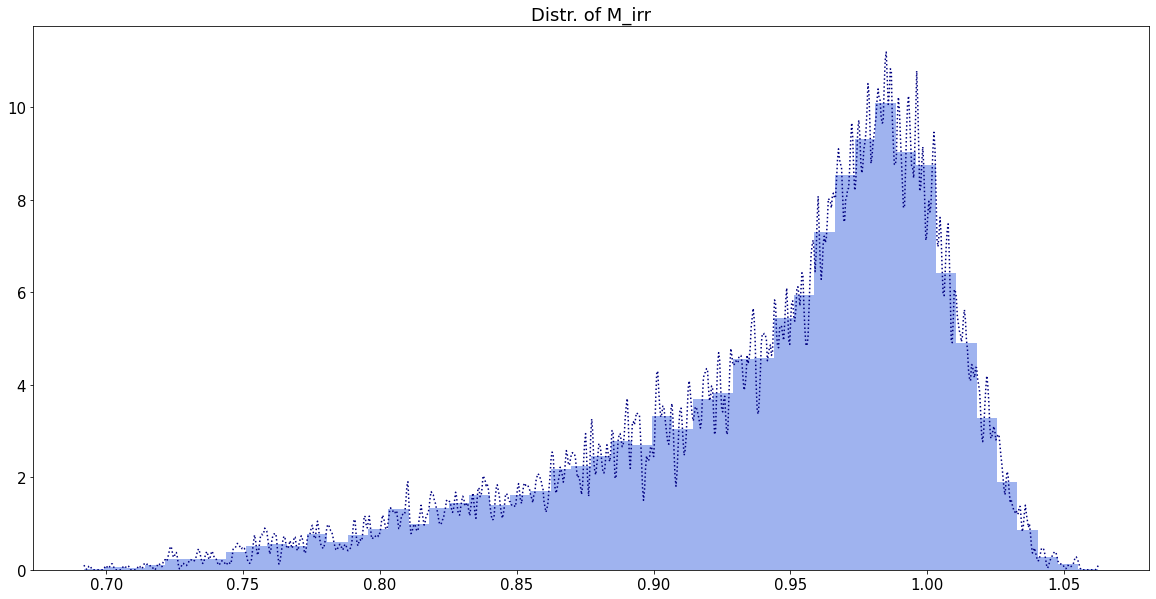

In [67]:
import numpy as np
from tqdm.notebook import tqdm
from scipy import stats
# from scipy import interpolate
# import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 15

mu = 1
sigma = 0.02
N = 10000
chi = np.random.uniform(0,1,N)
M = stats.norm(loc=mu,scale=sigma).rvs(N)

dist = lambda chi, M : M*np.sqrt((1+np.sqrt(1-chi**2))/2)
M_irr = dist(chi,M)
h = plt.hist(M_irr, bins=50, color='royalblue', density=True, alpha=0.5)
plt.title('Distr. of M_irr')

xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)
from sklearn.neighbors import KernelDensity

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

PDFtophat = kde_sklearn(M_irr, 0.001, "linear") #Complete
plt.plot(xgrid, PDFtophat, c='navy', ls=':') #Complete

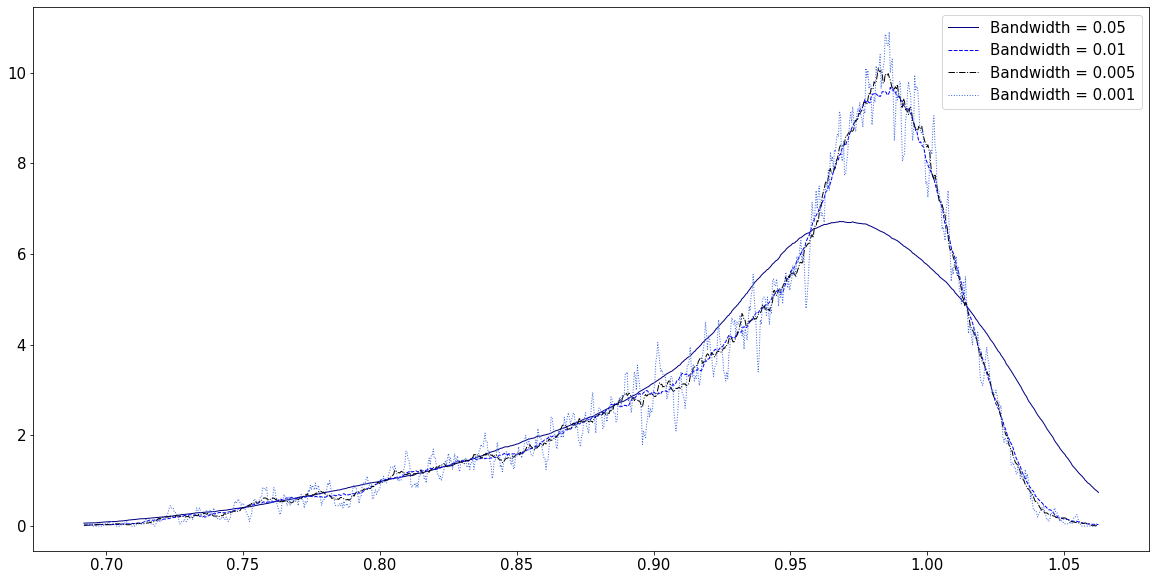

In [69]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)

def kde_sklearn(data, bandwidth, kernel='linear'):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

bandwidths = [0.05,0.01,0.005,0.001]
colors = ['navy','blue','k','royalblue']
linestyles = ['-','--','-.',':']

for bw,c,line in tqdm(zip(bandwidths,colors, linestyles)):
    PDFtophat = kde_sklearn(M_irr, bw, kernel="tophat") #Complete
    plt.plot(xgrid,PDFtophat,color=c, ls=line, lw=1,
            label='Bandwidth = '+str(bw)) #Complete
plt.legend()
plt.show()

5. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

6. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

7. You should find that

\begin{alignat}{10}
p\left(M_{\rm irr}\right)  &\simeq \frac{\pi(M_{\rm irr}/\mu)}{\mu} \qquad&&{\rm for}\quad {\sigma}\ll \mu\,, \label{limit1}\\
p(M_{\rm irr})  &\simeq \mathcal{N}(\mu,\sigma) \qquad && {\rm for}\quad \sigma\gg \mu \,. \label{limit2}
\end{alignat}

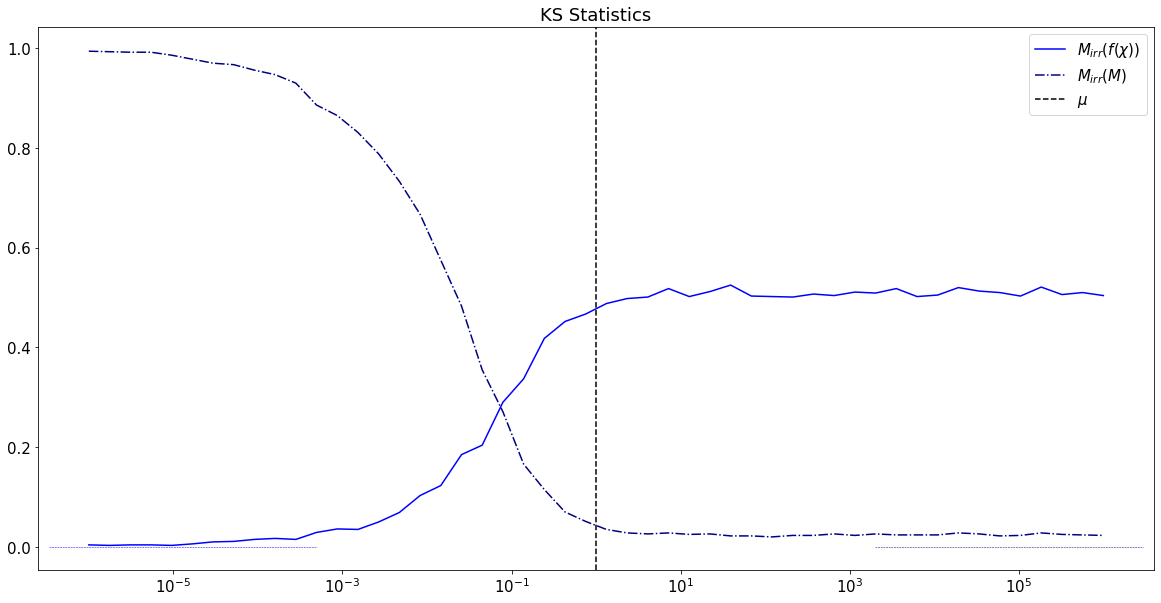

In [70]:
def KS(sigma):
    L = len(sigma)
    ks_f = np.array([None for i in range(L)])
    ks_M = np.array([None for i in range(L)])
    mu = 1
    N = 1000
    chi = np.random.uniform(0,1,N)
    littlef = lambda chi : np.sqrt( 0.5*( 1+np.sqrt(1-chi**2) ) )
    f = littlef(chi)
    for i in tqdm(range(L)):
        M = stats.norm(loc=mu,scale=sigma[i]).rvs(N)
        ks_M[i] = stats.ks_2samp( M, f*M )[0]
        ks_f[i] = stats.ks_2samp( f, f*M )[0]
    plt.plot(sigma, ks_f, c='blue', label='$M_{irr}(f( \chi ))$')
    plt.plot(sigma, ks_M, c='navy', label='$M_{irr}(M)$', ls='-.')
    
    plt.axvline(mu, c='k', ls='--', label='$\mu$')
    plt.axhline(0,xmin=0.01,xmax=0.25,c='blue', lw=0.5, ls='--')
    plt.axhline(0,xmax=1-0.01,xmin=1-0.25,c='navy', lw=0.5, ls='--')
    
    plt.title('KS Statistics')
    plt.xscale('log')
    plt.legend()
    return

sigmas = np.logspace(-6,6,50)
KS(sigmas)

8. (At home...)  Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If yes please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}

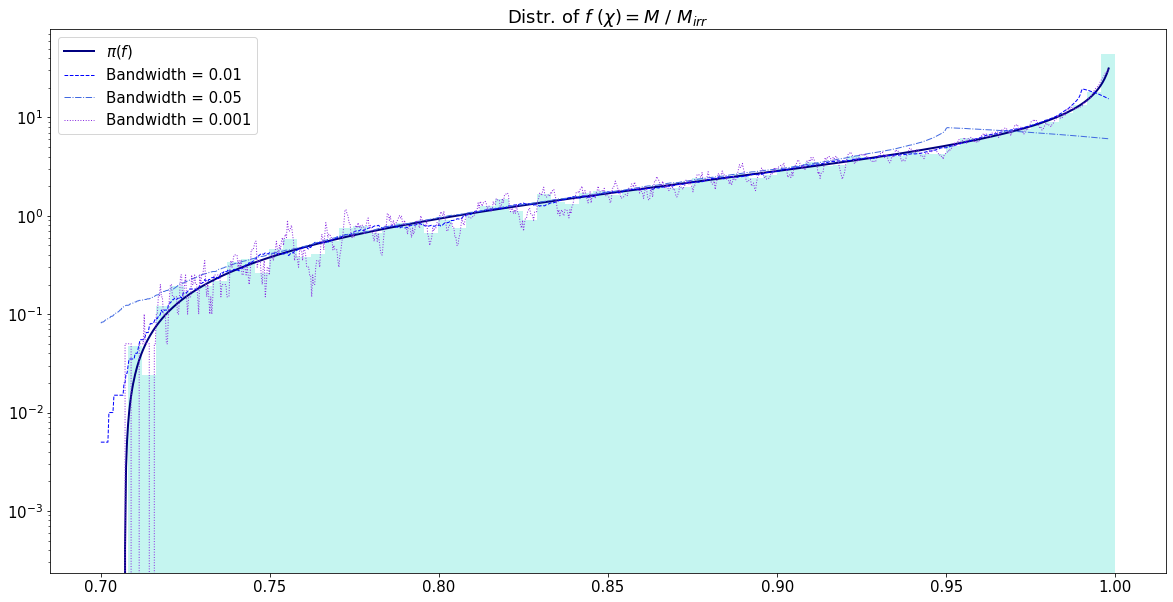

In [71]:
pi = lambda f : 2*(2*f**2-1)/(np.sqrt(1-f**2))
h_f = plt.hist(M_irr/M, bins=70, density=True, color='turquoise', alpha=0.3)
plt.title(r'Distr. of $f \ (\chi) = M \ / \ M_{irr}$')
#x_f = np.linspace(0.7,0.998,100)
xgrid = np.linspace(0.7,0.998,1000)
plt.plot(xgrid, pi(xgrid), c='navy', ls='-', lw=2, label='$\pi(f)$')

bandwidths = [0.01,0.05,0.001]
colors = ['blue','royalblue','blueviolet']
linestyles = ['--','-.',':']

for bw,c,line in tqdm(zip(bandwidths,colors, linestyles)):
    PDFtophat = kde_sklearn(M_irr/M, bw, kernel="tophat") #Complete
    plt.plot(xgrid,PDFtophat,color=c, ls=line, lw=1,
            label='Bandwidth = '+str(bw)) #Complete
    #plt.show()
plt.legend()
plt.semilogy()
plt.show()